# Notebook 1: Data Collection (Heart Disease Dataset)

This notebook handles **data acquisition and initial inspection** of the Heart Disease dataset from Kaggle.  

Establishing a reliable data source and saving it in a structured folder ensures reproducibility and a consistent 

workflow for later notebooks.  



## Objectives

- **Fetch data** from Kaggle and save it as raw data.  
  
- **Inspect dataset structure** (variables, types, missing values, duplicates).  
  
- **Save inspected data** under `outputs/datasets/collection/` for reuse.  



## Inputs

- **Kaggle JSON file** (authentication token).  
  
- **Kaggle dataset**: [Heart Disease Dataset](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data).  



## Outputs

- `inputs/datasets/raw/heart_disease_uci.csv` — raw dataset from Kaggle. 
   
- `outputs/datasets/collection/heart_disease_inspected.csv` — inspected dataset.  
  
- `outputs/figures/missing_values_heatmap.png` — quick visualization of missing values.  


---

## Step 1 — Change Working Directory

**Purpose**  

Ensure the notebook runs correctly regardless of where it is executed.  

We standardize the working directory so relative file paths work consistently.  

**Approach**  

- Get the current working directory with `os.getcwd()`.  
  
- Move one level up to the project root using `os.path.dirname()`.  
  
- Confirm the new working directory.  

**Expected Outcome**  

The notebook always points to the project’s root directory, ensuring clean and reproducible file handling.  

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Heart_disease_risk_predictor/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Heart_disease_risk_predictor'

---

## Step 1.1 — Fetch Data from Kaggle

We now download the dataset from Kaggle using the Kaggle API.  

**Purpose**  

Automate dataset acquisition so any collaborator can reproduce results by simply running this notebook.  

**Approach**  

1. Install the `kaggle` package.  
   
2. Authenticate with the Kaggle token (`kaggle.json`). 
    
3. Define dataset path (`redwankarimsony/heart-disease-data`) and download it into `inputs/datasets/raw/`.  
   
4. Unzip the downloaded file and remove temporary files.  

**Expected Outcome**  

The raw dataset `heart_disease_uci.csv` is saved in the `inputs/datasets/raw/` folder, ready for inspection.  


In [4]:
%pip install kaggle==1.5.12


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Once you do that run the cell below, so the token is recognised in the session

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

chmod: cannot access 'kaggle.json': No such file or directory


We are using the following [Kaggle URL](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

Get the dataset path from the Kaggle url
* When you are viewing the dataset at Kaggle, check what is after https://www.kaggle.com/ .

Define the Kaggle dataset, and destination folder and download it.

In [6]:
KaggleDatasetPath = "redwankarimsony/heart-disease-data"
DestinationFolder = "inputs/datasets/raw"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Traceback (most recent call last):
  File "/home/cistudent/.local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/cistudent/.local/lib/python3.12/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/home/cistudent/.local/lib/python3.12/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /workspaces/Heart_disease_risk_predictor. Or use the environment method.


Unzip the downloaded file, delete the zip file and delete the kaggle.json file

In [7]:
! unzip {DestinationFolder}/*.zip -d {DestinationFolder} \
  && rm {DestinationFolder}/*.zip \
  && rm kaggle.json

unzip:  cannot find or open inputs/datasets/raw/*.zip, inputs/datasets/raw/*.zip.zip or inputs/datasets/raw/*.zip.ZIP.

No zipfiles found.


---

## Step 1.2 — Load and Inspect Dataset

**Purpose** 

Confirm the dataset has been downloaded correctly and understand its structure.  

**Approach**  

- Load the CSV file into a pandas DataFrame.  
  
- Preview the first few rows.  
  
- Document dataset variables with human-readable definitions.  

**Expected Outcome**  

A loaded dataset that matches expectations, with each column clearly defined for easier interpretation in future 

notebooks.  

In [8]:
import pandas as pd

# Load heart disease data
data_path = "/workspaces/Heart_disease_risk_predictor/inputs/datasets/raw/heart_disease_uci.csv"
df = pd.read_csv(data_path)

# Show first 5 rows
print("Dataset loaded successfully! First 5 rows of dataset:")
display(df.head())

Dataset loaded successfully! First 5 rows of dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


---

## 1.3. Dataset Variable Definitions

The dataset columns are abbreviated; here we provide definitions for clarity. 

This dictionary serves as documentation for anyone using the dataset.  

In [9]:
column_definitions = {
    "id": "Patient ID",
    "age": "Age (years)",
    "sex": "Sex (1 = male, 0 = female)",
    "dataset": "Dataset origin identifier",
    "cp": "Chest Pain Type (0 = typical angina, 1 = atypical angina, 2 = non-anginal, 3 = asymptomatic)",
    "trestbps": "Resting Blood Pressure (mm Hg)",
    "chol": "Serum Cholesterol (mg/dl)",
    "fbs": "Fasting Blood Sugar > 120 mg/dl (1 = true, 0 = false)",
    "restecg": "Resting ECG results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)",
    "thalch": "Maximum Heart Rate Achieved",
    "exang": "Exercise Induced Angina (1 = yes, 0 = no)",
    "oldpeak": "ST depression induced by exercise relative to rest",
    "slope": "Slope of peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)",
    "ca": "Number of major vessels (0–3) colored by fluoroscopy",
    "thal": "Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)",
    "num": "Diagnosis of heart disease (0 = <50% diameter narrowing, 1 = >50%)"
}

# Convert to DataFrame for a nice display
definitions_df = pd.DataFrame(
    list(column_definitions.items()), 
    columns=["Column", "Description"]
)
display(definitions_df.style.set_properties(**{'text-align': 'left'}))

,Column,Description
0,id,Patient ID
1,age,Age (years)
2,sex,"Sex (1 = male, 0 = female)"
3,dataset,Dataset origin identifier
4,cp,"Chest Pain Type (0 = typical angina, 1 = atypical angina, 2 = non-anginal, 3 = asymptomatic)"
5,trestbps,Resting Blood Pressure (mm Hg)
6,chol,Serum Cholesterol (mg/dl)
7,fbs,"Fasting Blood Sugar > 120 mg/dl (1 = true, 0 = false)"
8,restecg,"Resting ECG results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)"
9,thalch,Maximum Heart Rate Achieved


---

## Step 1.4 — Basic Dataset Information

**Purpose**  

Quickly assess dataset structure and potential data quality issues.  

**Approach**  

- Display dataset info (datatypes, non-null counts).  
  
- Show dataset shape (rows × columns).  
  
- Count missing values per column.  
  
- Compute percentage of missing values.  
  
- Check for duplicates.  
  
- Generate descriptive statistics for numeric and non-numeric features.  

**Expected Outcome**  

An overview of dataset completeness, data quality, and variable distributions, highlighting potential cleaning needs.  

In [10]:
print("Dataset Info:")
df.info()

print("\nShape (rows, columns):", df.shape)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Shape (rows, columns): (920, 16)


Check missing values per column

In [11]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
display(missing_values)

Missing values per column:


ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
cp            0
dataset       0
id            0
age           0
sex           0
num           0
dtype: int64

Percentage of missing values

In [12]:
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print("Value in % of missing values")
display(missing_percentage)

Value in % of missing values


ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
cp           0.000000
dataset      0.000000
id           0.000000
age          0.000000
sex          0.000000
num          0.000000
dtype: float64

Check for Duplicates

In [13]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


Basic stats for numerical columns. This allows to identify which values can be used right away and which ones require conversion to numerical values

In [14]:
print("Numerical variables in the dataset")
display(df.describe())

print("Non-numerical varibales in the dataset")
df.describe(exclude=['number'])


Numerical variables in the dataset


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Non-numerical varibales in the dataset


,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


---

## Step 1.5 — Visualize Missingness

**Purpose**  

Get a quick graphical overview of missing values in the dataset.  

**Approach**  

- Use `seaborn.heatmap()` to plot missing values.  
  
- Each row corresponds to one record; yellow marks indicate missing entries.  

**Expected Outcome**  

A clear visualization of where missingness occurs, making it easier to spot patterns (e.g., entire columns with gaps).  

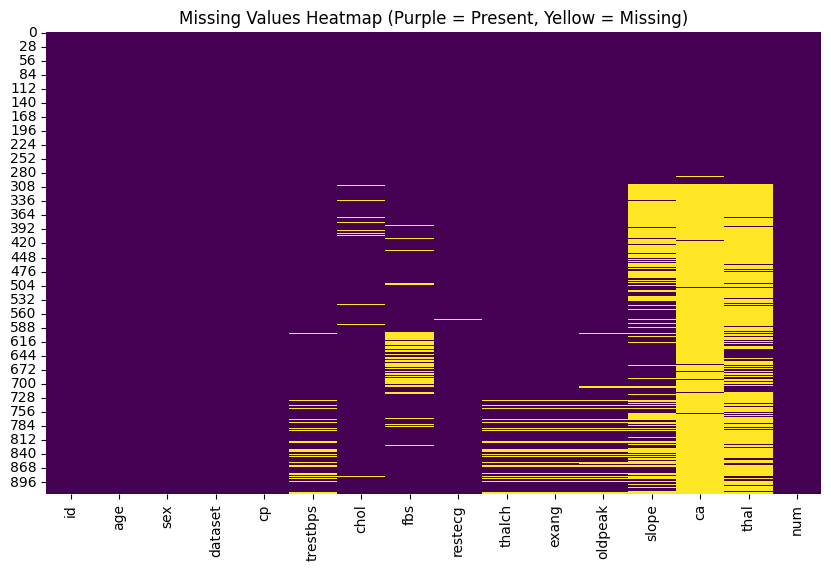

In [15]:
import matplotlib.pyplot as plt  # Base plotting engine
import seaborn as sns  # Makes statistical plots easier

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")  # One-liner missing values heatmap
plt.title("Missing Values Heatmap (Purple = Present, Yellow = Missing)")
plt.show()


---

# Step 1.6 — Save Outputs

**Purpose**  

Store the inspected dataset and figures so that results can be reused without rerunning the entire notebook.  

**Approach**  

- Save inspected dataset to `outputs/datasets/collection/heart_disease_inspected.csv`. 
   
- Save missing values heatmap to `outputs/figures/missing_values_heatmap.png`.  

**Expected Outcome**  

All outputs are stored under `outputs/` folders, ensuring organized and reproducible project artifacts.  

In [16]:
import os

os.makedirs("outputs/figures", exist_ok=True)
os.makedirs("outputs/datasets/collection", exist_ok=True)

# Save the current (cleaned) dataset
df.to_csv("outputs/datasets/collection/heart_disease_inspected.csv", index=False)

# Save missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")  # One-liner missing values heatmap
plt.title("Missing Values Heatmap (Purple = Present, Yellow = Missing)")
plt.savefig("outputs/figures/missing_values_heatmap.png", bbox_inches="tight")
plt.close()

print("Cleaned dataset and figures saved successfully in outputs/ folder.")

Cleaned dataset and figures saved successfully in outputs/ folder.


---

# ✅ Conclusions and Next Steps

**In this notebook, we:**  

1. Set up the working directory to the project root.  
   
2. Downloaded the Heart Disease dataset from Kaggle.  
   
3. Inspected the dataset structure, variable definitions, missing values, duplicates, and summary statistics.  
   
4. Saved the inspected dataset and a missingness heatmap for later use.  

---

**Next Steps (Notebook 2 & 3):**  

- Perform deeper **exploratory data analysis (EDA)** to identify trends, correlations, and data quality issues. 
   
- Apply **data cleaning and preprocessing** (handling missing values, encoding, etc.).  
  
- Prepare the dataset for machine learning models in subsequent notebooks.  